In [1]:
from LDAR_dutyholder import LDAR_travel
import datetime
import numpy as np

In [2]:
# Create a inspection plan with name of dutyholder, id, epsg code of 
# the UTM_zone for projection, and mode -> mirror  
A = LDAR_travel('shared',1,26912,'mirror')

In [3]:
# create a graph with service center locates at 0,0 ot cartesian coordinate system 
X = [0]
Y = [0]
A.create_empty_graph_with_sc(X,Y)

In [4]:
# create highway, and road setting (Forested), the default setting is Agriculture
nid,eid = A.create_highways(2138027,676423396,15000,5000,80,setting= "Forested")
# randomly sampled 50 points to represent LDAR sites 
A.create_random_points_as_LDAR_sites(50,15000)

In [5]:
# Add attributes to site list 
A.sites['lon'] = A.sites.geometry.x
A.sites['lat'] = A.sites.geometry.y
A.sites['dist_diff'] = np.zeros(len(A.sites))
A.sites['time_diff'] = np.zeros(len(A.sites))
A.sites['siteID'] = np.arange(1,len(A.sites)+1,1)
# create gravel roads to connect sites to highway
nid,eid = A.create_gravel_roads_forest (15000,500,10,nid,eid,80,50)
nid,eid = A.create_backroads_forest(nid,eid,50,30)
A.sites['node'] = A.Site_nodes
# sample the inspection time for each site 
A.sample_inspection_time(r'ins_time_example.csv')

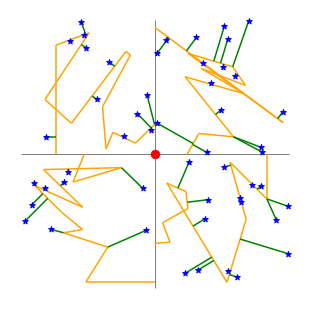

In [7]:
# visualize the artifical O&G field 
A.create_GDB('Forested',4326)
A.create_plot(setting = "Forested")

In [8]:
# case: 1 leak inspection agent, and he works 8 hours per day
start_time = datetime.datetime(2022,1,1,8)
end_time = datetime.datetime(2022,1,1,16)
A.create_agent(1,start_time,end_time)

In [9]:
# start the leak inspection 
A.deploy_agents()

2022-01-01 09:04:11.922185 finished leak inspection for site:  42 50
go home - we have leftover:  45
go home - we have leftover:  38
go home not even can travel to the next site:  32
2022-01-04 09:18:24.959472 finished leak inspection for site:  44 31
go home - we have leftover:  26
go home - we have leftover:  21
go home not even can travel to the next site:  14
2022-01-07 09:20:41.542134 finished leak inspection for site:  33 13
go home - we have leftover:  8
go home - we have leftover:  2
go home, finished the last site of program:  0


In [12]:
# generate the survey report 
A.generate_inspection_report()

In [13]:
A.Report[0]

,transit_between_sites,dist_between_sites,transit_home_site,dist_home_site,daily_num_sites,Nodes
0,4486.693610,59057.278825,874.694922,13520.879819,7,"[[0, 676423530], [676423530, 676423536], [6764..."
1,5336.608012,58887.243108,3982.489877,58081.850090,8,"[[0, 676423466], [676423466, 676423448], [6764..."
2,5867.037006,61628.686656,4205.139476,62855.701280,6,"[[0, 676423478], [676423478, 676423458], [6764..."
3,6239.499264,62910.234651,1874.514322,25922.513512,7,"[[0, 676423534], [676423534, 676423546], [6764..."
4,8535.768834,112179.100399,4253.634964,61944.683983,6,"[[0, 676423528], [676423528, 676423468], [6764..."
5,4711.135736,47948.875113,4035.944243,60496.865291,7,"[[0, 676423492], [676423492, 676423484], [6764..."
6,5221.074997,61080.570085,2857.099247,42668.520335,7,"[[0, 676423512], [676423512, 676423518], [6764..."
7,6347.309664,89312.820143,4276.151378,62556.745985,7,"[[0, 676423514], [676423514, 676423524], [6764..."
8,1592.564404,18214.527107,4140.360952,57836.267569,2,"[[0, 676423486], [676423486, 676423504], [6764..."
